### Diabetes Risk Prediction System


  Objective:
The primary objective of the Diabetes Risk Prediction 
System is to develop a predictive model that can 
accurately assess the risk of diabetes in individuals based 
on their health data. Specific objectives include:
1.Collecting and preprocessing relevant medical datasets.
2.Applying appropriate machine learning techniques to 
predict diabetes risk.
3. Evaluating the model's performance through metrics 
such as accuracy, precision, recall, and AUC (Area 
Under the Curve).
4.Developing an easy-to-use interface for healthcare 
professionals to input patient data and receive risk 
assessments.

### Importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [29]:
#importing the data
data = pd.read_csv(r"C:\Users\anujj\Downloads\diabetes_risk_prediction_dataset.csv")

In [4]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
data.describe(include="O")

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [8]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

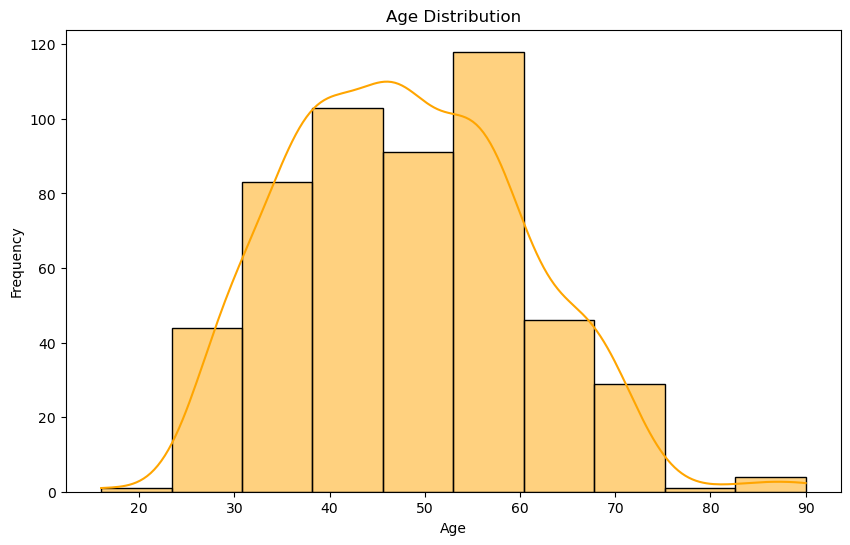

In [9]:
data.columns = map(str.lower, data.columns)

plt.figure(figsize=(10, 6))
sns.histplot(data["age"], bins=10, color="orange", kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

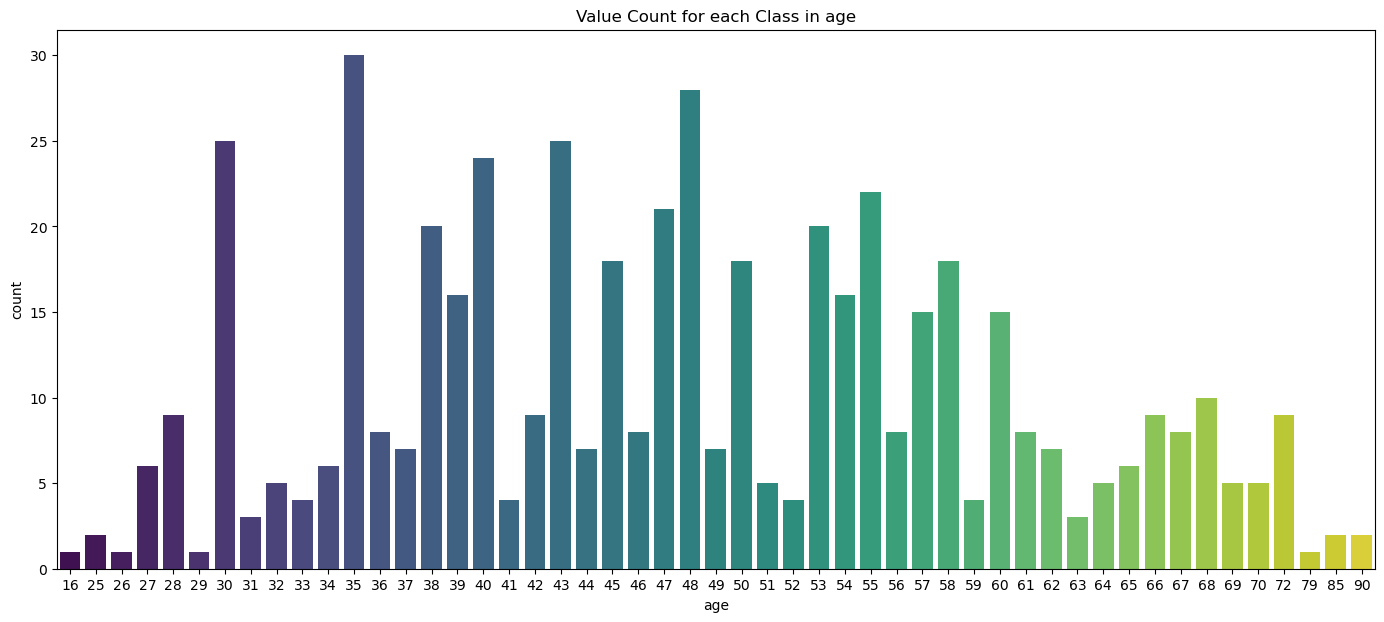

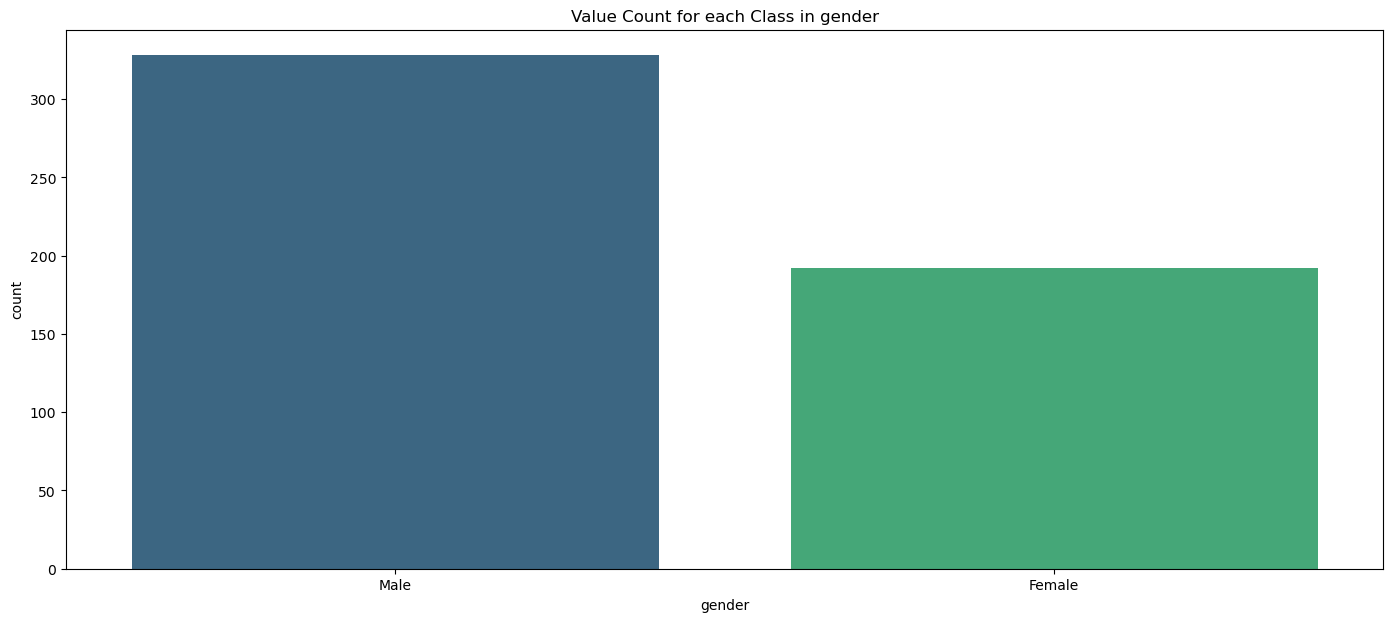

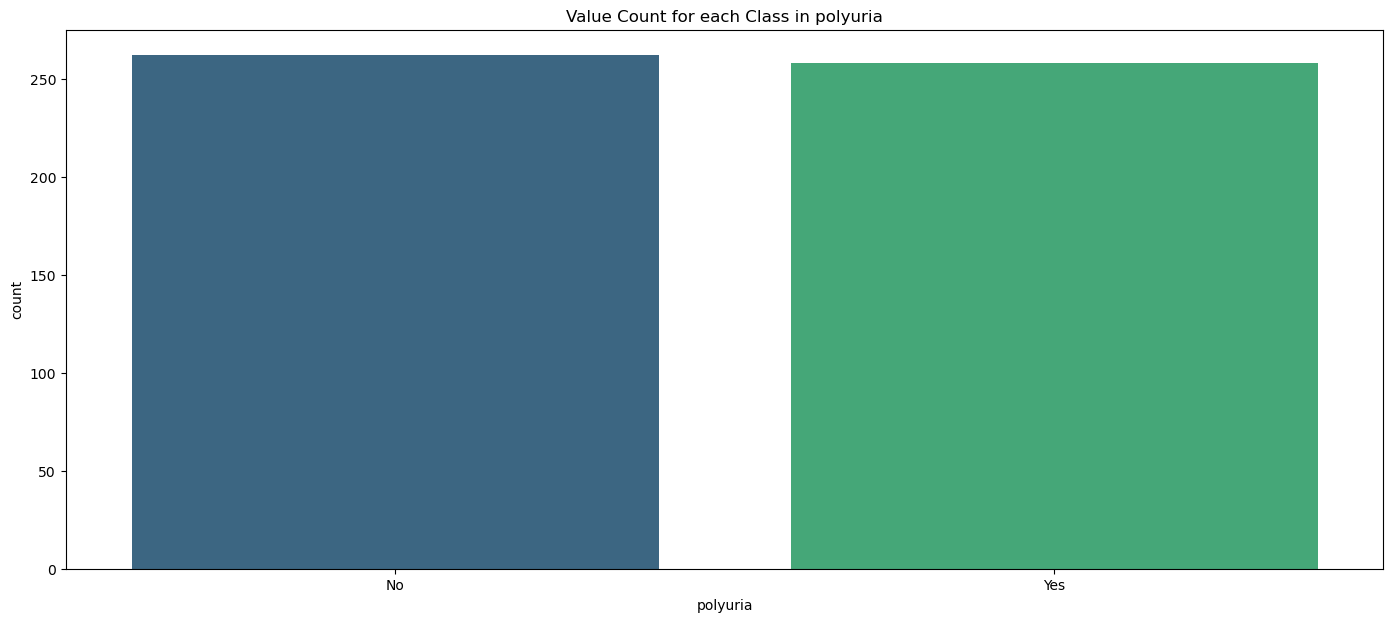

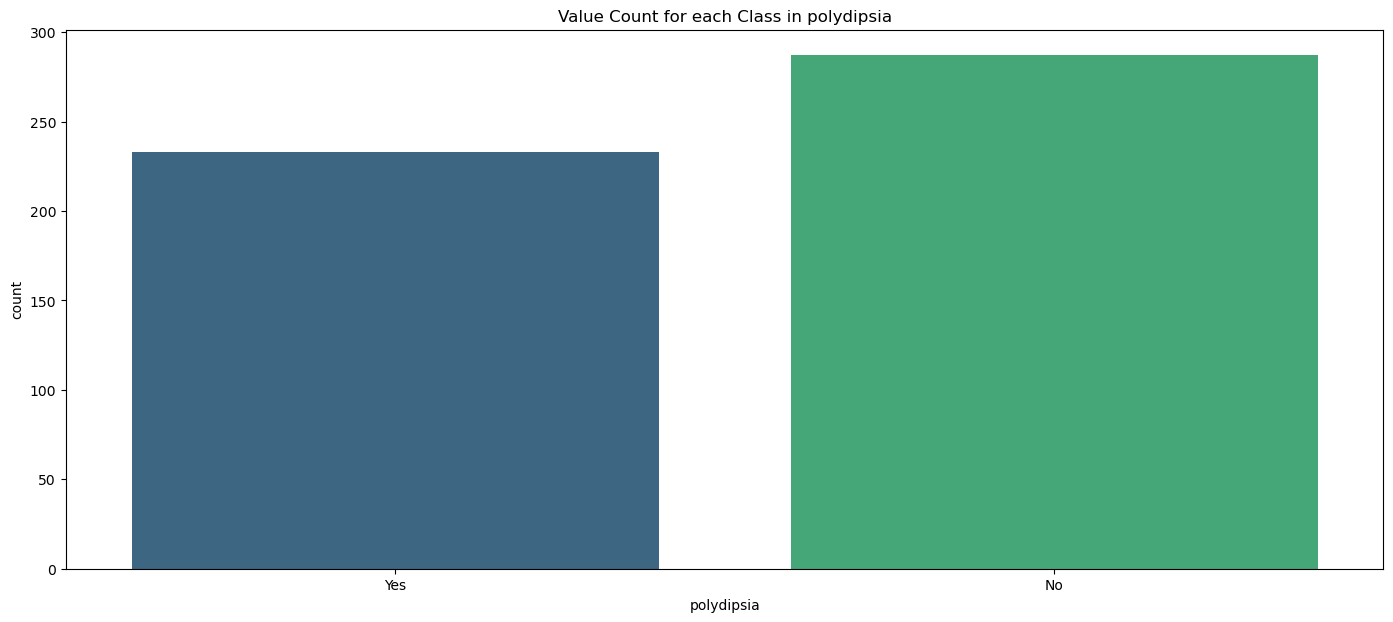

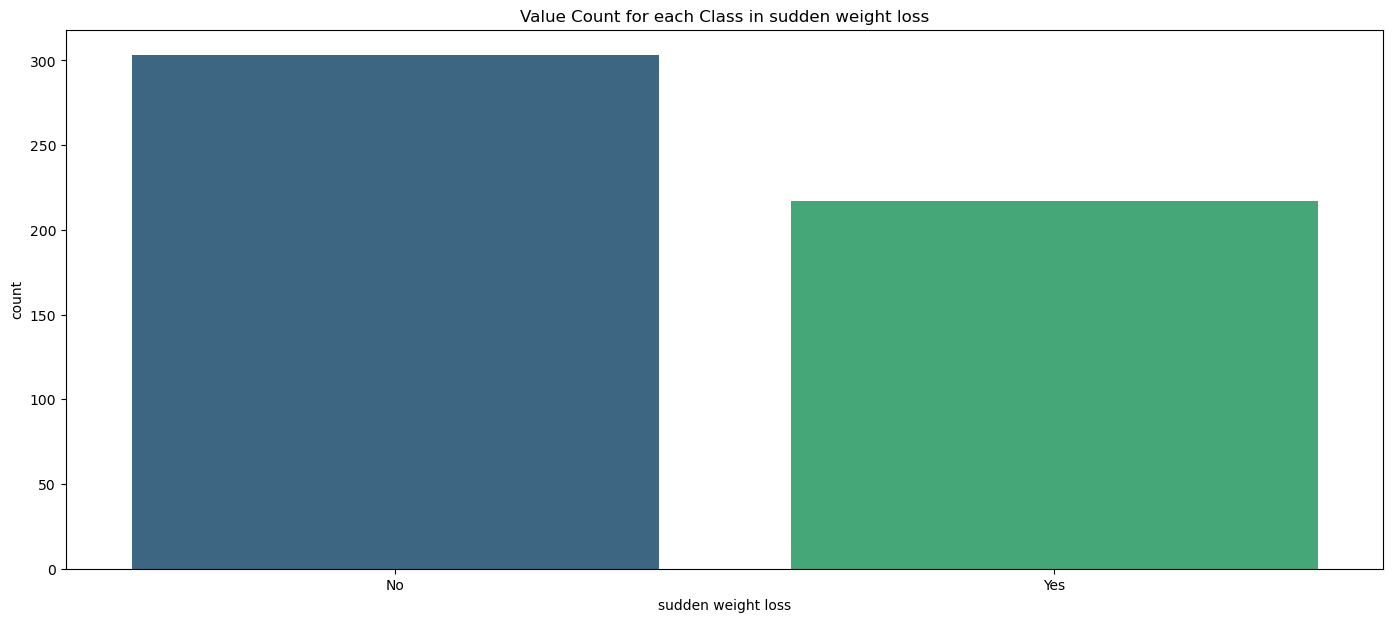

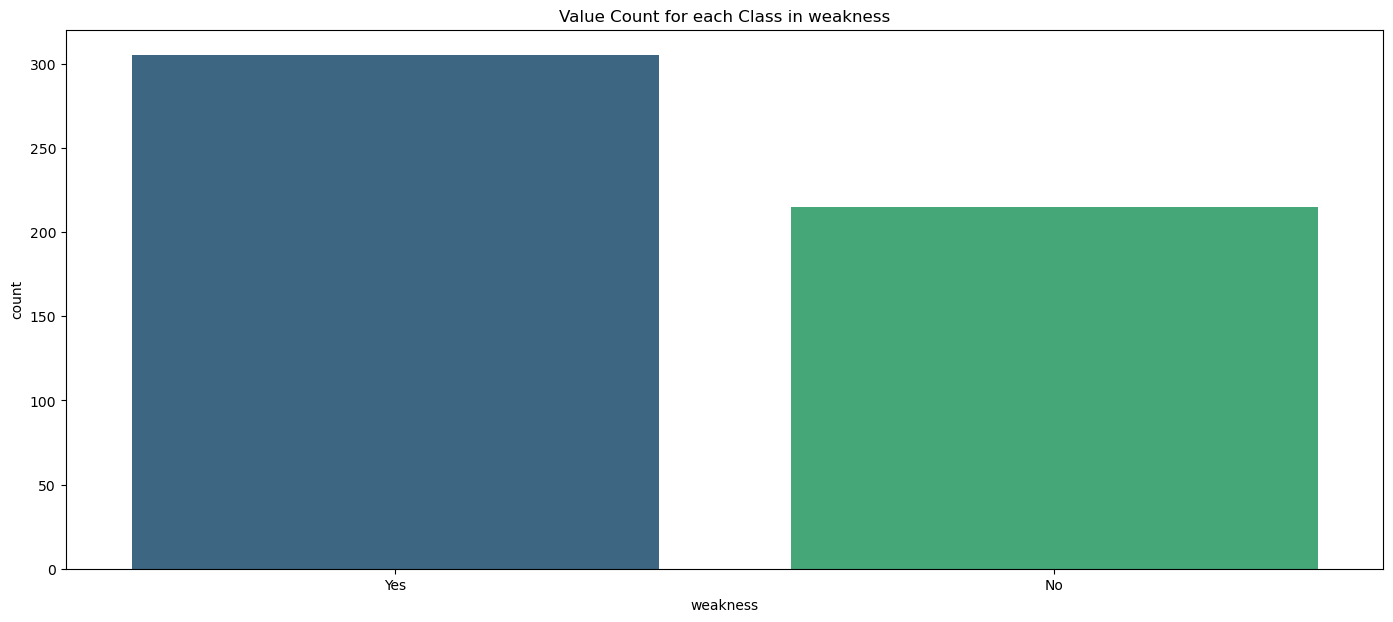

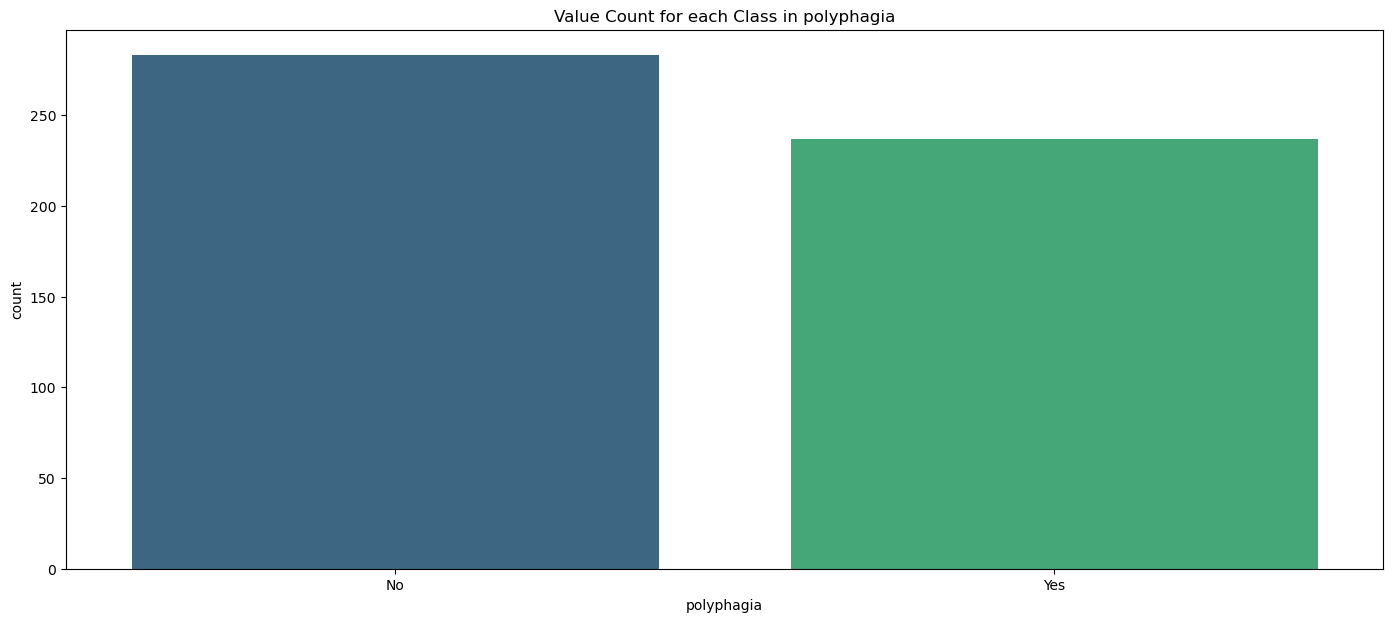

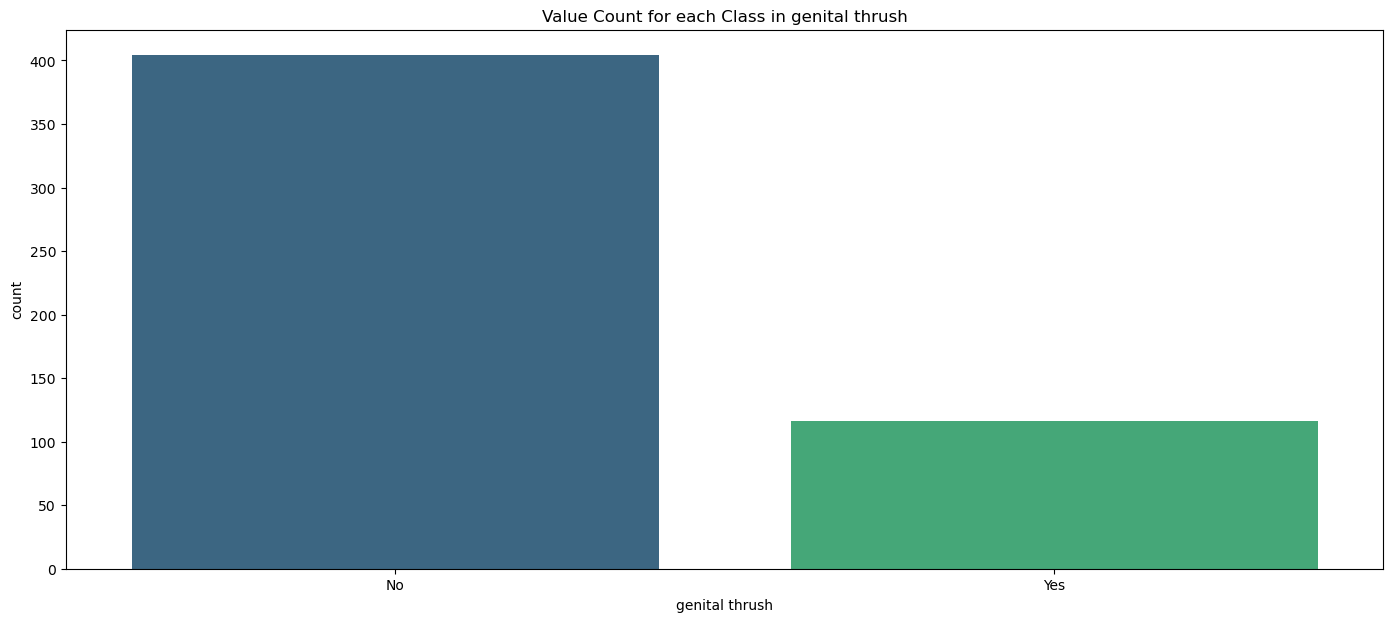

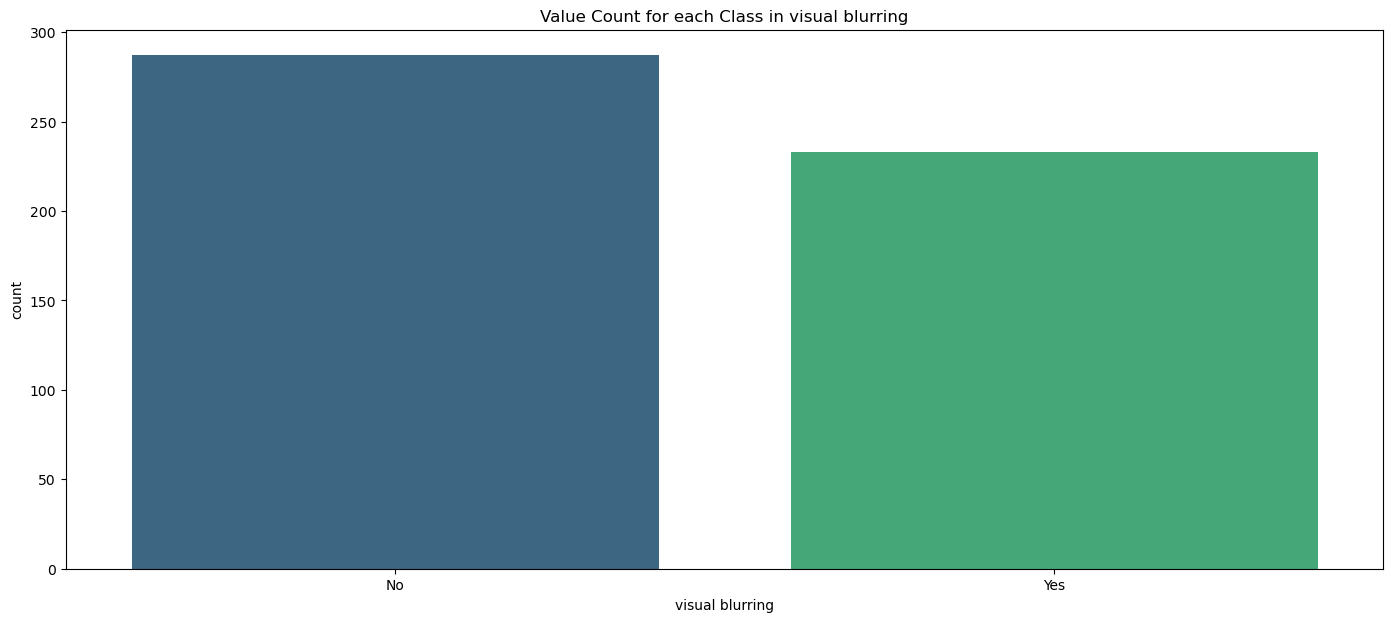

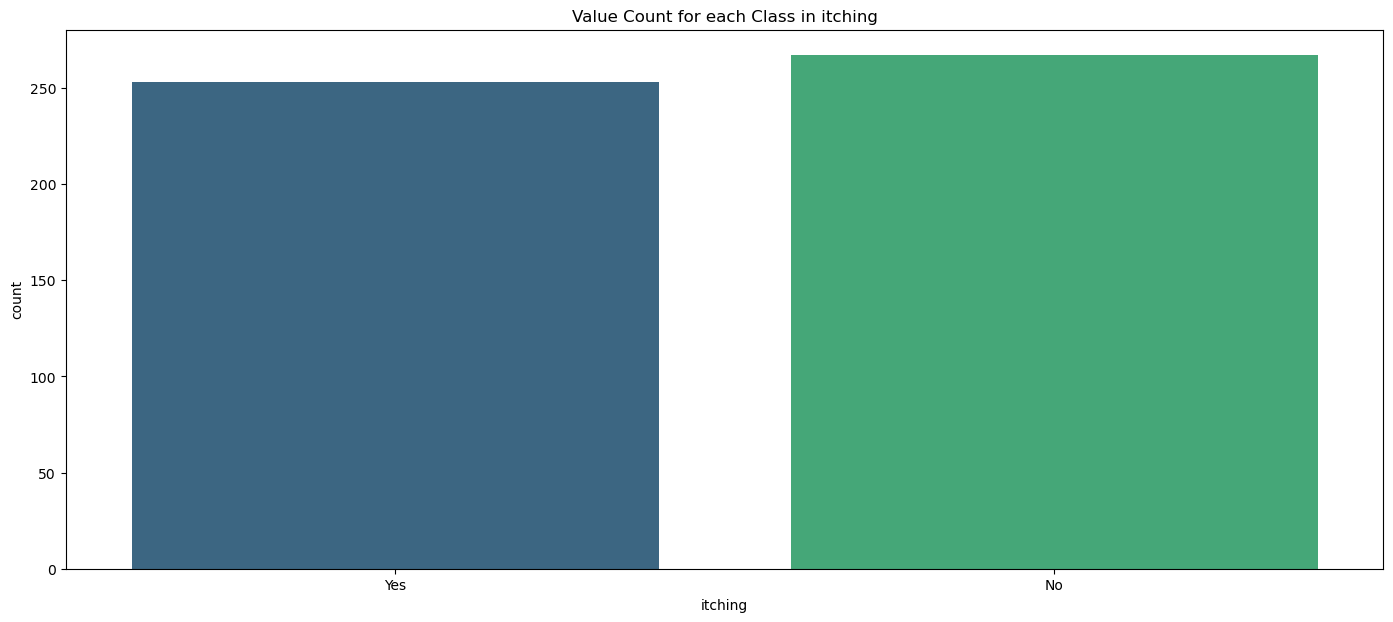

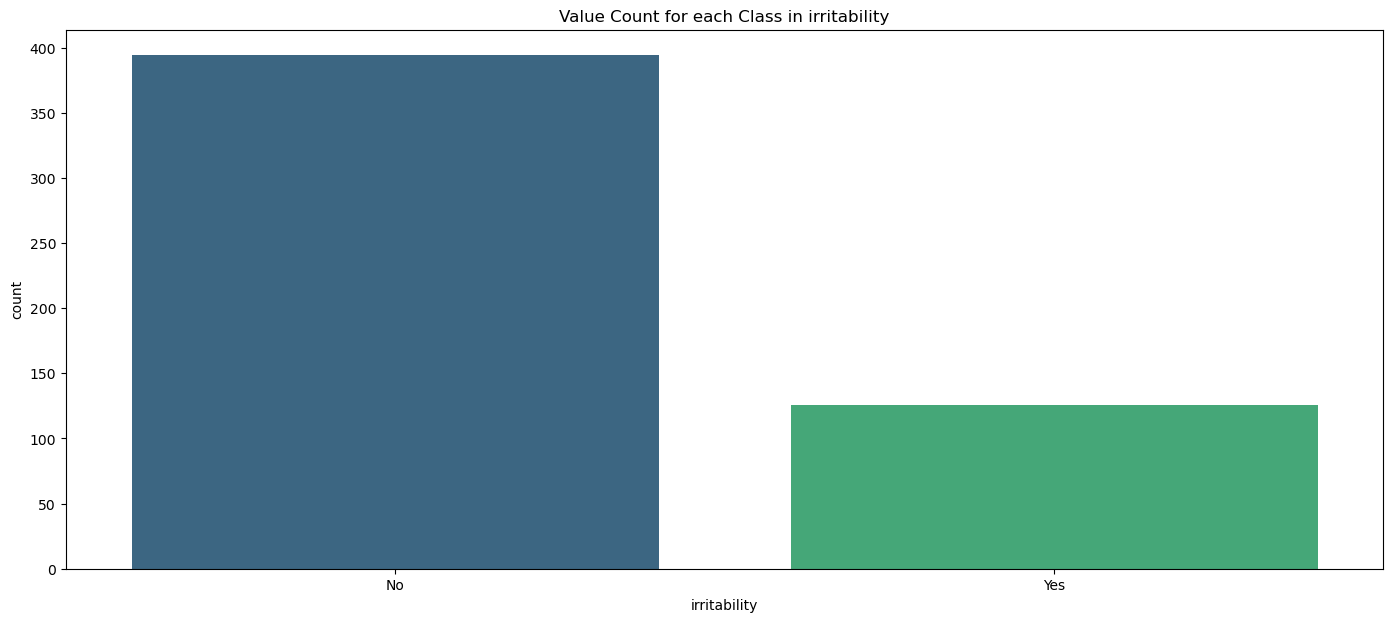

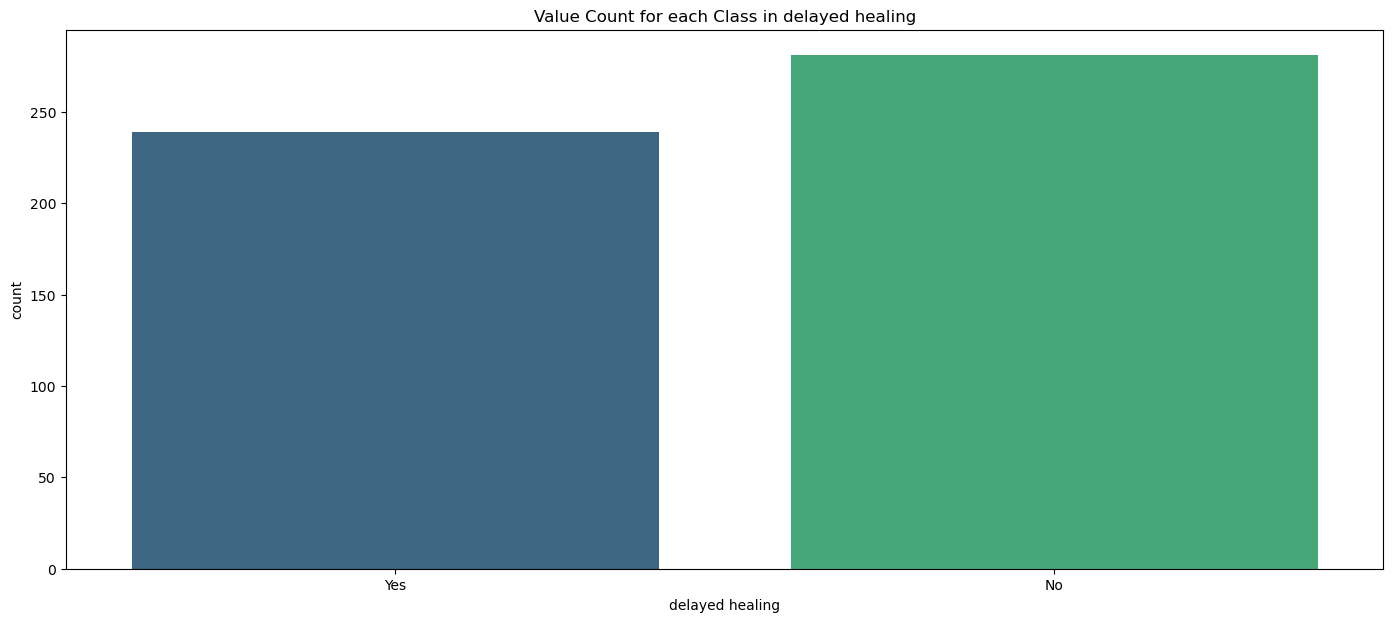

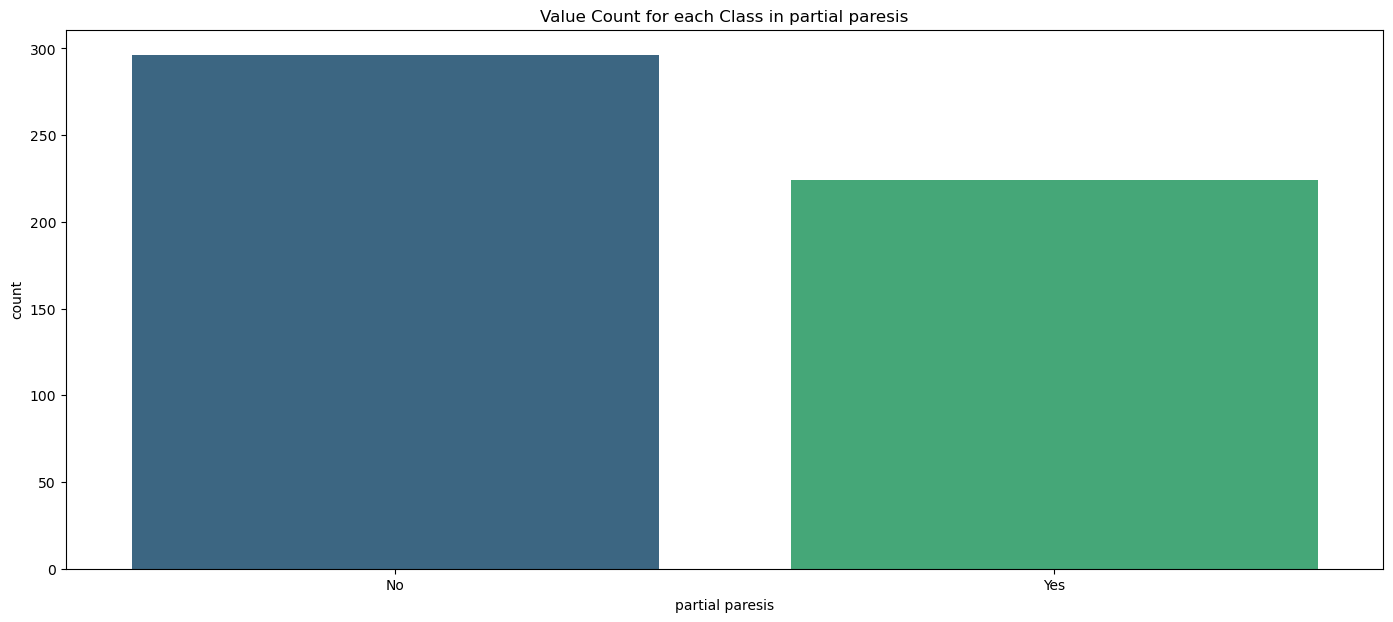

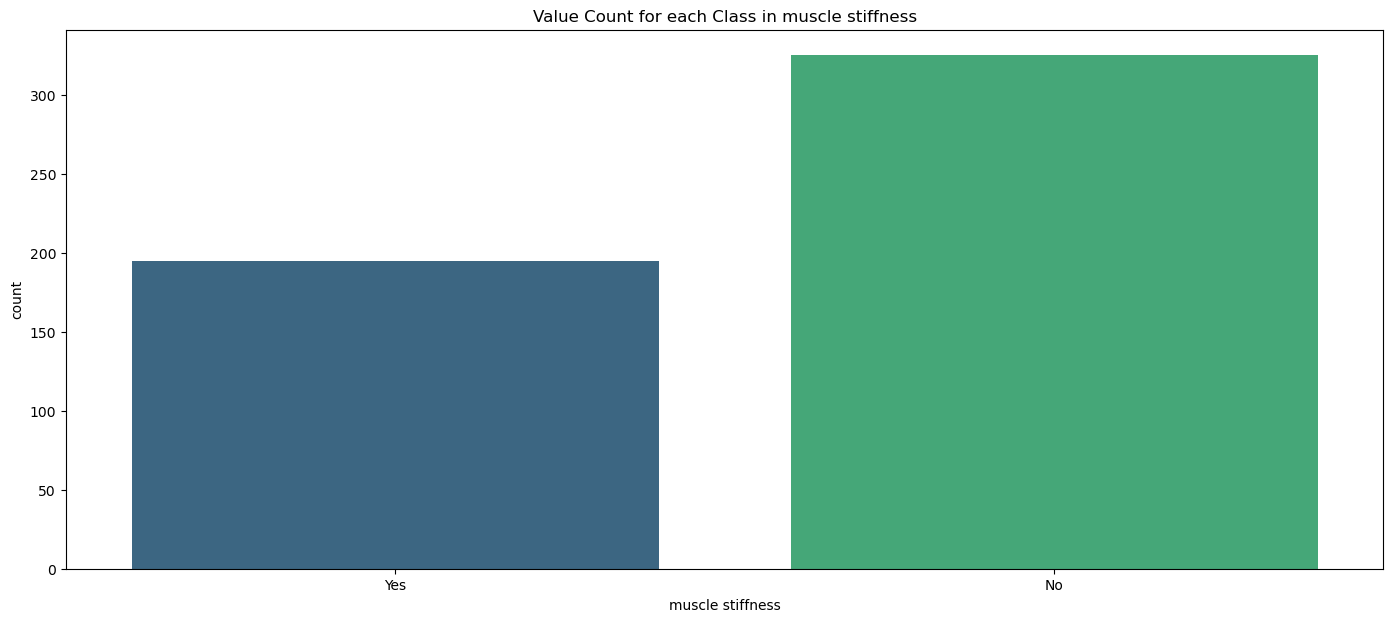

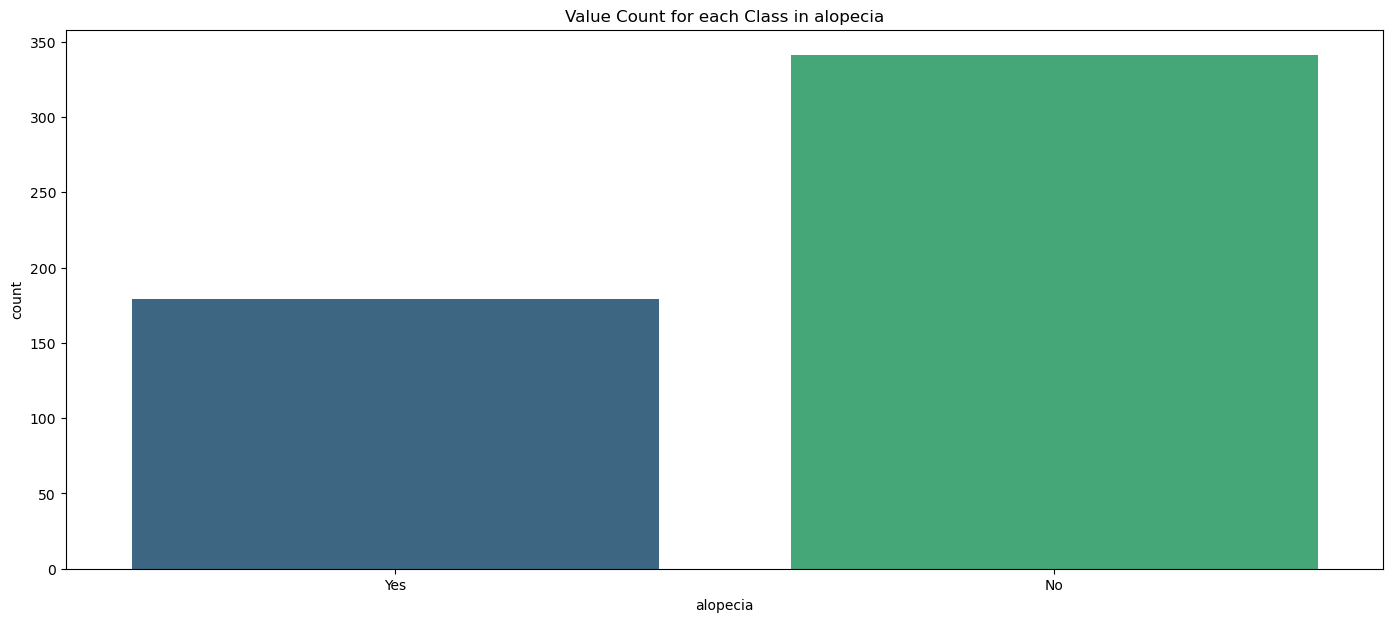

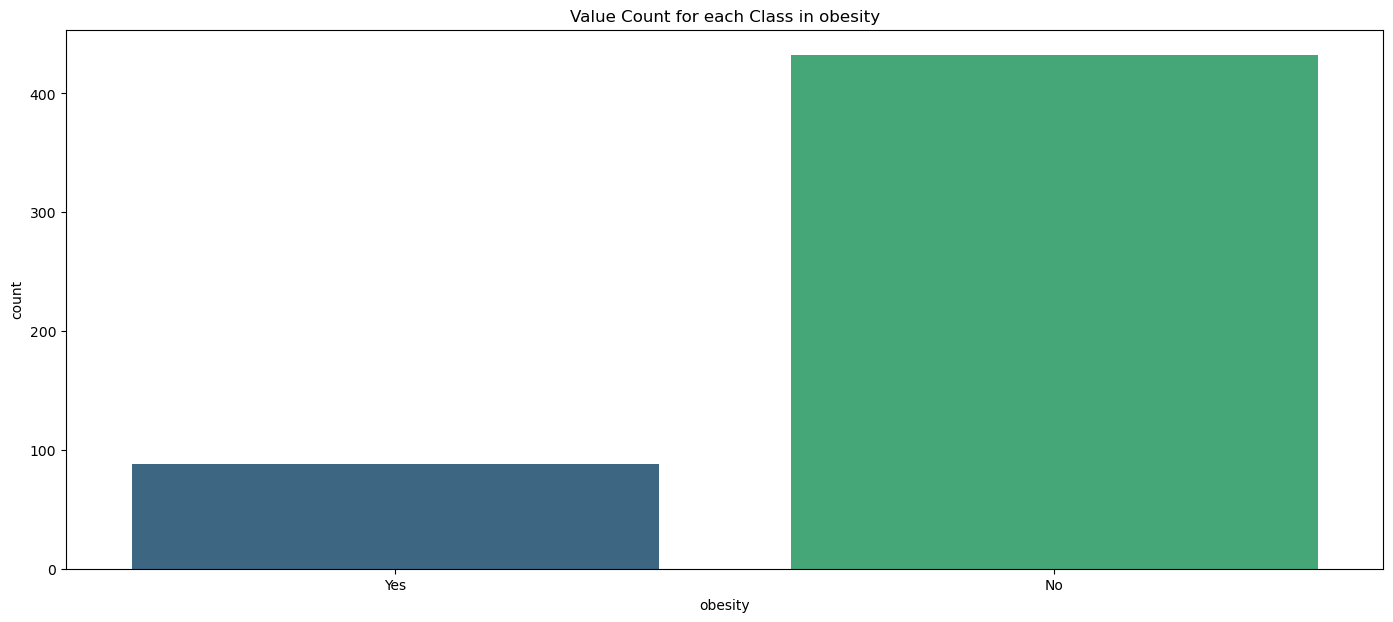

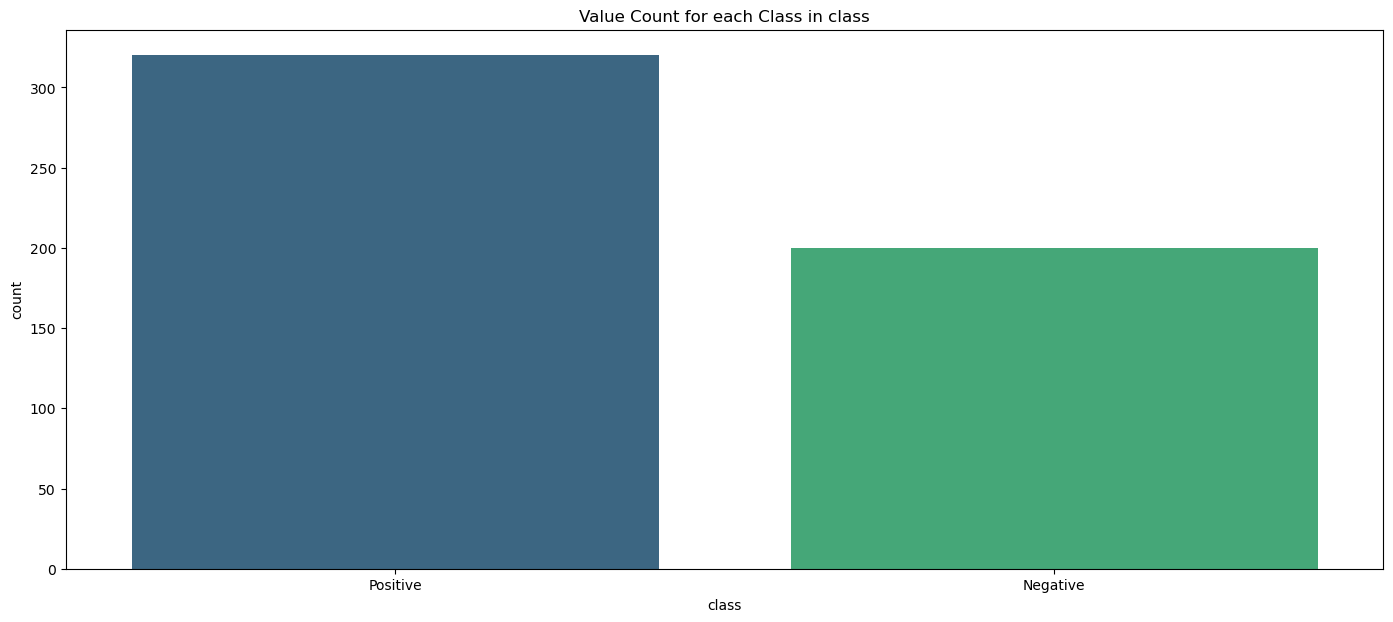

In [10]:
for col in data:
    plt.figure(figsize=(17, 7))
    sns.countplot(x=col, data=data, palette="viridis")
    plt.title(f"Value Count for each Class in {col}")
    plt.show()

In [11]:
mapping = {"Yes":1, "No":0, "Negative":0, "Positive":1}

In [12]:
for col in data:
    if col != "gender":
        data[col] = data[col].apply(mapping.get)

In [13]:
data.sample(5)

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
127,None,Male,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1
440,None,Male,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
471,None,Male,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
434,None,Male,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1
464,None,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Importing libraries required for ML

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### splitting the data for train and test

In [15]:
X, y = data.drop(columns=["class"]), data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [16]:
X_train.head()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity
336,None,Male,0,0,0,0,0,0,0,0,0,0,0,0,1,0
204,None,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,None,Female,0,0,1,1,1,0,0,0,0,0,0,1,0,0
129,None,Male,1,1,1,1,0,0,0,1,0,0,1,0,1,0
9,None,Male,0,1,1,1,1,0,1,1,1,0,0,0,1,0


In [17]:
X_train.shape

(416, 16)

In [19]:
X_test.head()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity
31,None,Male,1,1,1,1,1,1,1,1,1,0,0,0,0,1
29,None,Male,1,1,1,1,1,0,1,0,1,0,1,0,1,0
449,None,Female,1,1,1,1,0,0,1,1,0,0,1,1,0,0
367,None,Female,1,1,1,1,0,0,1,0,0,1,1,1,0,0
189,None,Female,1,0,1,1,1,1,1,1,0,1,0,0,1,0


In [20]:
X_test.shape

(104, 16)

In [21]:
y_train

336    0
204    0
81     1
129    1
9      1
      ..
218    0
223    0
271    1
474    0
355    0
Name: class, Length: 416, dtype: int64

In [22]:
y_train.value_counts()

class
1    251
0    165
Name: count, dtype: int64

In [23]:
ohe_col = ["gender"]

X_train_encoded = pd.concat([X_train.drop(ohe_col, axis=1), pd.get_dummies(X_train[ohe_col], drop_first=True)], axis=1)
X_test_encoded = pd.concat([X_test.drop(ohe_col, axis=1), pd.get_dummies(X_test[ohe_col], drop_first=True)], axis=1)

X_train_encoded.head()

,age,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,gender_Male
336,None,0,0,0,0,0,0,0,0,0,0,0,0,1,0,True
204,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
81,None,0,0,1,1,1,0,0,0,0,0,0,1,0,0,False
129,None,1,1,1,1,0,0,0,1,0,0,1,0,1,0,True
9,None,0,1,1,1,1,0,1,1,1,0,0,0,1,0,True


In [24]:
X_test_encoded.head()

,age,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,gender_Male
31,None,1,1,1,1,1,1,1,1,1,0,0,0,0,1,True
29,None,1,1,1,1,1,0,1,0,1,0,1,0,1,0,True
449,None,1,1,1,1,0,0,1,1,0,0,1,1,0,0,False
367,None,1,1,1,1,0,0,1,0,0,1,1,1,0,0,False
189,None,1,0,1,1,1,1,1,1,0,1,0,0,1,0,False


In [25]:
X_enc_df = pd.concat([X_train_encoded, X_test_encoded])
X_enc_df.head()

,age,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,gender_Male
336,None,0,0,0,0,0,0,0,0,0,0,0,0,1,0,True
204,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
81,None,0,0,1,1,1,0,0,0,0,0,0,1,0,0,False
129,None,1,1,1,1,0,0,0,1,0,0,1,0,1,0,True
9,None,0,1,1,1,1,0,1,1,1,0,0,0,1,0,True


Logistic Regression

In [26]:
X_train_encoded_clean = X_train_encoded.dropna()
y_train_clean = y_train[X_train_encoded_clean.index]

In [27]:
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train_encoded_imputed = imputer.fit_transform(X_train_encoded)

C:\Users\anujj\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [28]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Use mean imputation, change strategy as needed
    ('lr', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train_encoded, y_train)
pred = pipeline.predict(X_test_encoded)
accuracy = accuracy_score(y_test, pred)
print ("The accuracy is : " , accuracy)

The accuracy is :  0.9326923076923077


C:\Users\anujj\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\anujj\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
